In [1]:
import copy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pywaffle import Waffle
import numpy as np
import seaborn as sns

In [2]:
bg = '#11134A'
txt = '#FAF9F1'
rosso = '#E48484'
palette = [ '#E48484', '#F7956E', '#FDB761', '#FEE08B', '#E6F598', '#ABDDA4', '#66C2A5', '#6FCED9', '#7F8DDD', '#A084C3' ]

mpl.rcParams['text.color'] = txt
mpl.rcParams['axes.labelcolor'] = txt
mpl.rcParams['xtick.color'] = txt
mpl.rcParams['ytick.color'] = txt
mpl.rcParams['axes.facecolor'] = bg
mpl.rcParams['axes.edgecolor'] = txt

n.b. data refers to a small section of the city

In [3]:
pop = pd.read_csv( '../../data/pop-darsena.csv' )

In [4]:
pop_eta = copy.copy(pop)
pop_fasce = pd.DataFrame({'cat': [], 'RESIDENTI_FEM': [], 'RESIDENTI_MAS': [], 'tot': []})
fasce = [0, 10, 20, 30, 40, 50, 60, 70, 80]

for start in fasce:
    end = start + 10
    x = copy.copy(pop_eta[pop_eta.index < end])
    x['tot'] = x['RESIDENTI_FEM'] + x['RESIDENTI_MAS']
    x['group'] = 1
    x = x.groupby(['group']).sum().reset_index(drop = True)
    x['cat'] = str(start) + '-' + str(end - 1)
    pop_fasce = pd.concat([pop_fasce, x])
    pop_eta = pop_eta[pop_eta.index >= end]
pop_eta['group'] = 1
pop_eta = pop_eta.groupby(['group']).sum().reset_index(drop = True)
pop_eta['cat'] = '  90+' # spaces to align in population pyramid
pop_eta['tot'] = pop_eta['RESIDENTI_FEM'] + pop_eta['RESIDENTI_MAS']
pop_fasce = pd.concat([pop_fasce, pop_eta])

residenti_tot = pop_fasce['tot'].sum()
pop_fasce['percent'] = 100 * pop_fasce['tot'] / residenti_tot
pop_fasce['label'] = pop_fasce['cat'] + ' - ' + round(pop_fasce['percent'], 2).astype(str) + '%'

print(pop_fasce.head(3))

     cat  RESIDENTI_FEM  RESIDENTI_MAS     tot    percent           label
0    0-9          424.0          442.0   866.0   8.949054     0-9 - 8.95%
0  10-19          438.0          542.0   980.0  10.127106  10-19 - 10.13%
0  20-29          504.0          541.0  1045.0  10.798801   20-29 - 10.8%


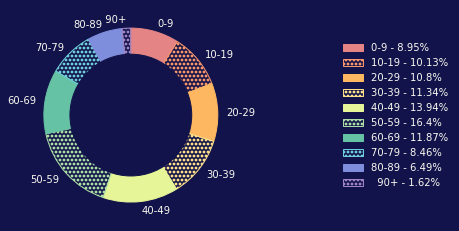

In [5]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(bg)
piechart, text = plt.pie( pop_fasce.percent.array, 
                         labels = pop_fasce.cat.array,
                         startangle = 90, 
                         counterclock = False,
                         colors = palette
                )

for i in range(len(piechart)):
    if (i % 2 != 0):
        piechart[i].set_color('none')
        piechart[i].set_hatch('ooo')
        piechart[i].set_linewidth(1)
    piechart[i].set_edgecolor(palette[i])

donut = plt.Circle( (0,0), 0.7, color = bg )
p = plt.gcf()
p.gca().add_artist(donut)

plt.legend(piechart, 
           pop_fasce.label.array, 
           bbox_to_anchor = (2, 0.5), 
           loc = 'center right', 
           frameon = False
          )

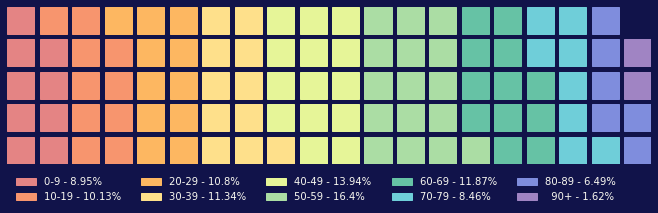

In [6]:
data = pd.Series(pop_fasce['percent'].values, index = pop_fasce['label']).to_dict()

fig = plt.figure(
    FigureClass = Waffle, 
    figsize = (10, 5), 
    rows = 5, 
    values = data, 
    colors = palette,
    legend = {'loc': 'lower left', 
              'ncol': 5,
              'bbox_to_anchor': (0, -0.30), 
              'frameon' : False,
              'labels': pop_fasce.label.array
             }
    )
    
fig.gca().set_facecolor(bg)
fig.set_facecolor(bg)
plt.show()

commented unified population pyramid

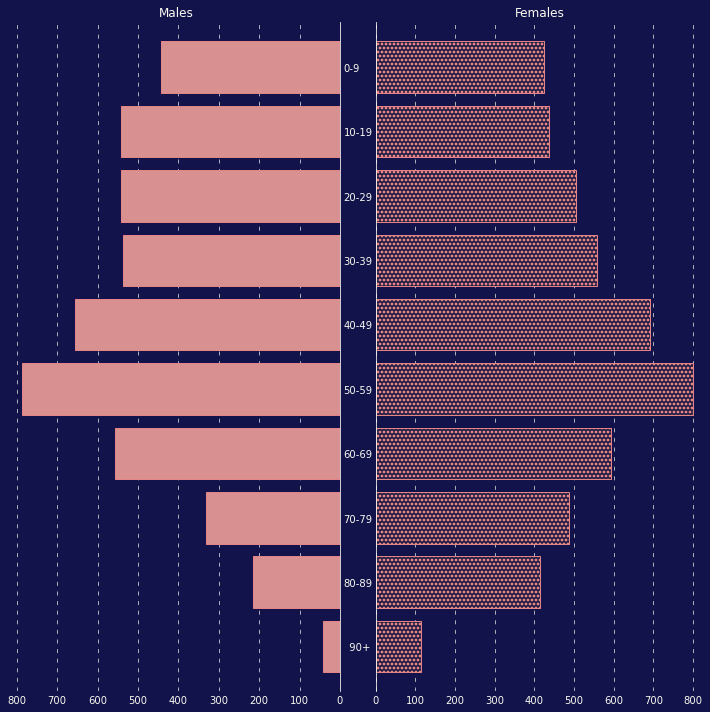

In [7]:
fig, axes = plt.subplots( ncols = 2, sharey = True,  figsize = (10, 10) )

bar_plot_m = sns.barplot(ax = axes[0], 
                       x = 'RESIDENTI_MAS', # n.b. not negative
                       y = 'cat', 
                       data = pop_fasce, 
                       order = pop_fasce['cat'].values,
                       color = rosso, 
                       edgecolor = rosso
                      )
axes[0].set(title='Males')

bar_plot_f = sns.barplot(ax = axes[1], 
                       x = 'RESIDENTI_FEM', 
                       y = 'cat', 
                       data = pop_fasce, 
                       order = pop_fasce['cat'].values, 
                       color = bg, 
                       hatch = 'ooo', 
                       edgecolor = rosso
                      )
axes[1].set(title='Females')

axes[0].invert_xaxis()
y = np.arange(len(pop_fasce['cat'].array))
axes[0].set(yticks = y,
            yticklabels = pop_fasce['cat'].values
           )
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig.patch.set_facecolor(bg)

    ax.xaxis.grid( color = '#d4d4d4', linestyle = (0, (5, 7)) )
    ax.set_axisbelow(True)
    ax.tick_params(axis = u'both', 
               which = u'both',
               length = 0
              )

bar_plot_m.set(xlabel = '', ylabel = '')
axes[0].spines['right'].set_visible(True)
bar_plot_f.set(xlabel = '', ylabel = '')
axes[1].spines['left'].set_visible(True)

fig.tight_layout()
fig.subplots_adjust(wspace = 0.11)
plt.show()

In [8]:
maschi = pop['RESIDENTI_MAS'].sum()
femmine = pop['RESIDENTI_FEM'].sum()
tot = maschi + femmine

pop_genere = pd.DataFrame({'cat': ['maschi', 'femmine'], 'tot': [maschi, femmine]})
pop_genere['percent'] = 100 * pop_genere['tot'] / tot
pop_genere['label'] = pop_genere['cat'] + ' - ' + round(pop_genere['percent'], 2).astype(str) + '%'

print(pop_genere)

       cat   tot    percent             label
0   maschi  4651  48.062416   maschi - 48.06%
1  femmine  5026  51.937584  femmine - 51.94%


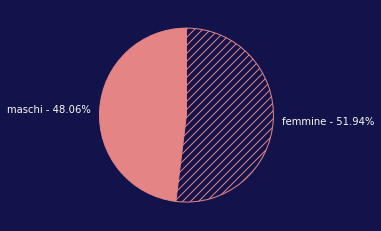

In [9]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(bg)
piechart = plt.pie( pop_genere.percent, 
                   labels = pop_genere.label.array,
                   startangle = 90,
                   colors = palette,
                   wedgeprops = {'edgecolor' : rosso}
                )
piechart[0][1].set_hatch("///")
piechart[0][1].set_color(bg)
piechart[0][1].set_edgecolor(rosso)